<a href="https://colab.research.google.com/github/Saimun-jd/ML-Projects/blob/main/California_Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


##Loading data from kaggle
---
**First download the data**
```
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/100 days of ML/kaggle.json" ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices
```
**Unzip the data**
```
import zipfile
zip_ref = zipfile.ZipFile('california-housing-prices.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
```

In [ ]:
housing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3


In [ ]:
housing['income_cat'].unique()

[5, 4, 3, 2, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

## Understanding the data
---
1. First the median income data is scaled and capped in range 15(15.0001) to 0.5(0.4999) for lower and higher median incomes. Meaning 4 is 40k dollars.
2. The housing_median_age and median_house_value is also capped.
3. many of the cols are rightly skewed

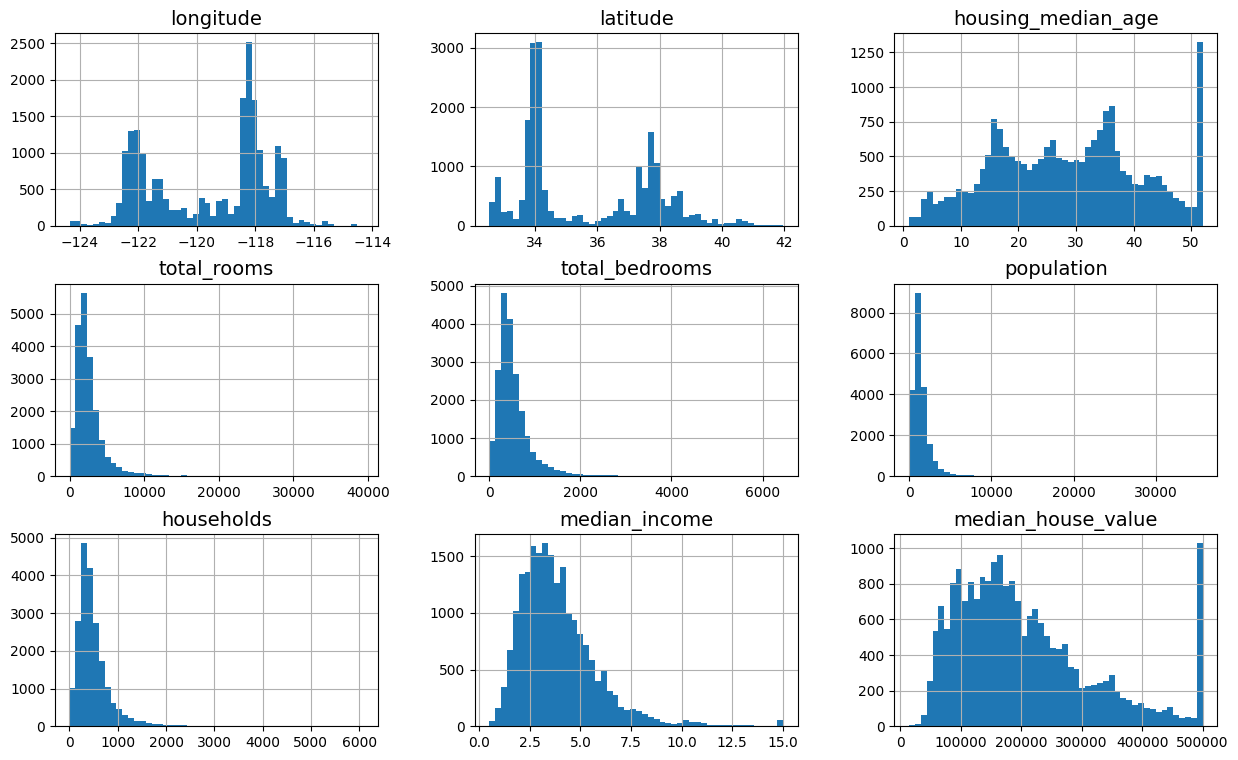

In [ ]:
housing.hist(bins=50, figsize=(15, 9))
plt.show()

###As the ocean_proximity column is only categorical we drop this column to make a new dataset only consisting numerical columns

In [ ]:
housing.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)

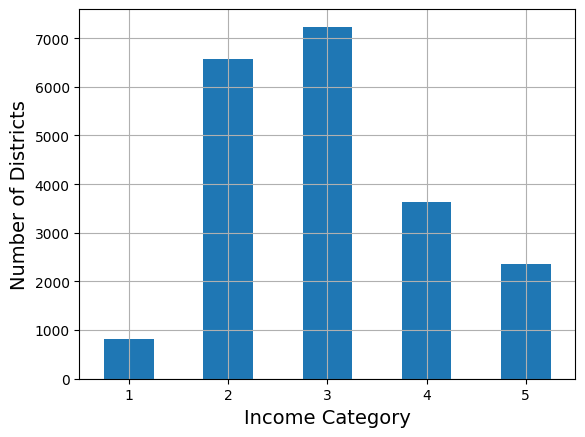

In [ ]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income Category')
plt.ylabel('Number of Districts')
plt.show()

#Split training and testing data
1. Why stratified split instead of regular split?
=> Regular splitting will not accurately represent the whole data. But if we divide the data to parts based on the income categorty then we can sample 0.2 percent form each categoty and that will better represent our dataset
2. Why 10 splits? => Having multiple splits can be useful if you want to better estimate the performance of your model and helps estimating cross validation

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42) #splitting the dataset into 10 strata
strat_split = []
for train_idx, test_idx in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_idx]
    strat_test_set_n = housing.iloc[test_idx]
    strat_split.append([strat_train_set_n, strat_test_set_n])

In [ ]:
train_set, test_set = strat_split[0]
test_set["income_cat"].value_counts() / len(test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [ ]:
# Dropping income_cat column as we don't need it after train test split
train_set.drop(columns=['income_cat'], axis=1, inplace=True)
test_set.drop(columns=['income_cat'], axis=1, inplace=True)

<ipython-input-12-759e483bb609>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop(columns=['income_cat'], axis=1, inplace=True)
<ipython-input-12-759e483bb609>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.drop(columns=['income_cat'], axis=1, inplace=True)


## Visualizing Data

In [ ]:
housing = train_set.copy() #copying as we don't want to edit our existing main data

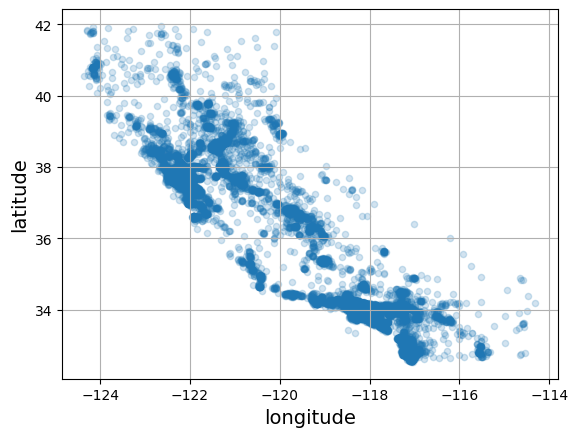

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

### The radius of the circle represents the districts population ans the color represents the price of the house

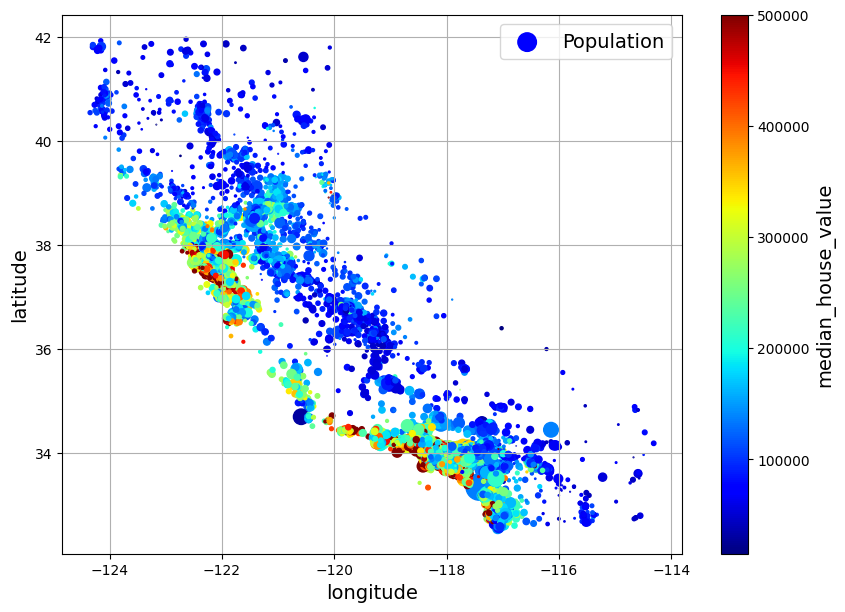

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing["population"] / 100, label="Population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7)
        )
plt.show()
# red is expensive, blue is cheaper and large circled indicates areas with larger population

## Calculating correlations matrix between every pairs

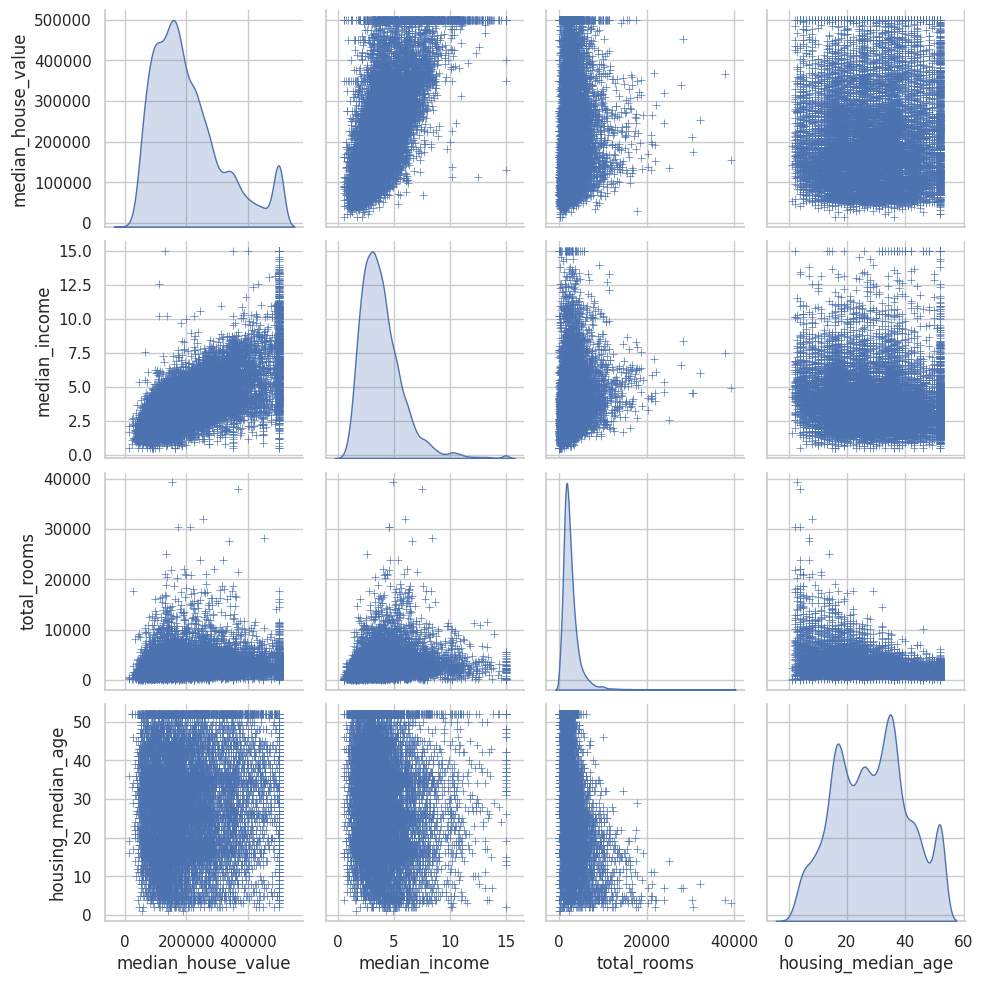

In [ ]:
sns.set(font_scale=1.0)
sns.set(style='whitegrid')

attribs = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(housing, vars = attribs, diag_kind='kde', markers="+")
plt.show()
# Conclusion: looking at the plot we can see that median_house_value has a strong correlation with median_house_income

### This shows a strong correlation between median_income and housing_median_value. Also the horizontal straight line above indicates the data is capped around $500000

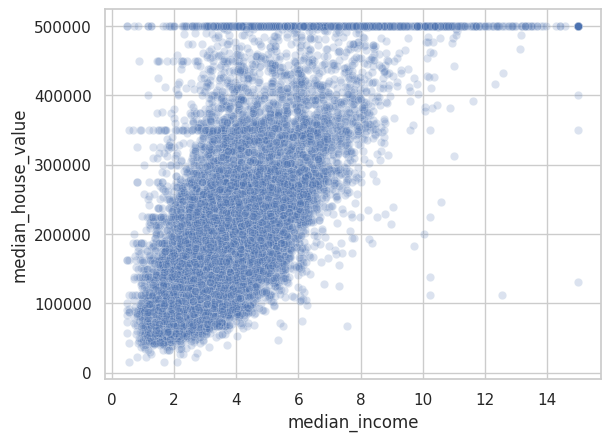

In [ ]:
sns.scatterplot(housing, x="median_income", y="median_house_value", alpha=0.2)
plt.show()

### The Population distribution shows a heavy tailed distribution

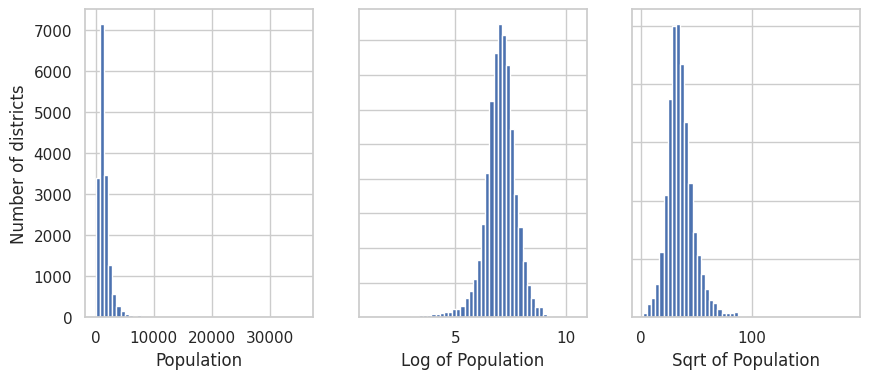

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.hist(housing['population'], bins=50)
plt.xlabel("Population")
plt.ylabel("Number of districts")

plt.subplot(132)
plt.hist(housing['population'].apply(np.log), bins=50)
plt.xlabel("Log of Population")
plt.tick_params(labelleft=False)

plt.subplot(133)
plt.hist(housing['population'].apply(np.sqrt), bins=50)
plt.xlabel("Sqrt of Population")
plt.tick_params(labelleft=False)

# Prepare the data for ML Algorithms

In [ ]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

### Imputing the missing values with median value

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num_attribs = housing.select_dtypes(include=[np.number])
X = imputer.fit_transform(housing_num_attribs)
housing_tr = pd.DataFrame(X, columns=housing_num_attribs.columns, index=housing_num_attribs.index)

In [ ]:
housing_tr.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0


### Handling Text and Categorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
housing_cat_attrib = housing[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_attrib)
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature Scaling and Transform

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_scaled = std_scaler.fit_transform(housing_num_attribs)

### Working with multimodal distribution

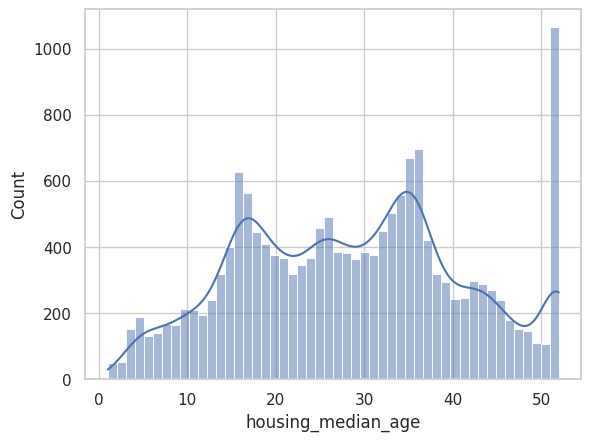

In [ ]:
sns.histplot(housing["housing_median_age"], bins=50, kde=True)
plt.show()

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

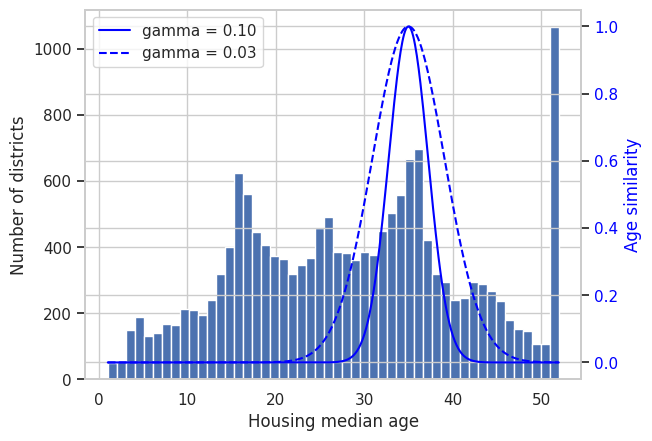

In [ ]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

### Apply Linear Regression

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
dummy_data = housing[["median_income"]].iloc[:5]
prediction = model.predict(dummy_data)
prediction

array([135958.75805364, 309735.008975  , 165232.3998617 , 138162.41971241,
       232903.1766333 ])

### Experiment: using Function Transformer to calculate geographical similarity  from sanfrancisco

In [ ]:
from sklearn.preprocessing import FunctionTransformer

sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])
sf_simil

array([[0.86435873],
       [0.0076117 ],
       [0.18013578],
       ...,
       [0.94757821],
       [0.9636345 ],
       [0.61315569]])

# Using our own custom transformer class

### Standerd Scaler using custom transformer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X) # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.std_dev_ = X.std(axis=0)
        self.n_feature_in_ = X.shape[1] # every estimator stores this in fit()
        return self

    def trnsform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_feature_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.std_dev_


### Finding the necessary number of clusters needed for kmeans clustering

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    km = KMeans(n_clusters=i)
    km.fit_predict(housing[["latitude", "longitude"]], sample_weight=housing_labels)
    wcss.append(km.inertia_)


In [ ]:
wcss

[27414508264.90218,
 2950258152.2855563,
 2251809373.317245,
 1621137324.8890796,
 1211254175.0675704,
 995709223.458016,
 885912906.6329404,
 730262698.9445299,
 584844336.7413558,
 538644582.7734203,
 499415092.4464682,
 447768308.18628,
 414261037.19215035,
 376961989.9023928]

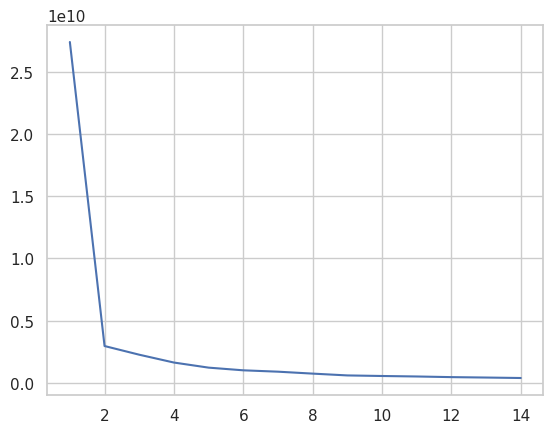

In [ ]:
plt.plot(range(1, 15), wcss)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=1.0, random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)

In [ ]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude",
    "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value(USD)",
})
housing_renamed["Max Cluster Similarity"] = similarities.max(axis=1) #Max of each row

In [ ]:
cluster_simil.kmeans_.cluster_centers_

array([[  37.89593931, -122.12886577],
       [  34.04841497, -118.30938031],
       [  32.94041504, -117.03877435],
       [  38.75501637, -121.20037843],
       [  34.47781715, -119.29533671],
       [  40.75228966, -123.84925066],
       [  36.64661432, -119.56752794],
       [  36.80783253, -121.80090508],
       [  33.84987268, -117.75660562],
       [  35.08457454, -120.53795747],
       [  38.52536826, -122.7347333 ],
       [  37.3671673 , -121.99813223],
       [  40.1902004 , -121.86408293],
       [  37.74695401, -122.43079219],
       [  37.7825505 , -121.00512645]])

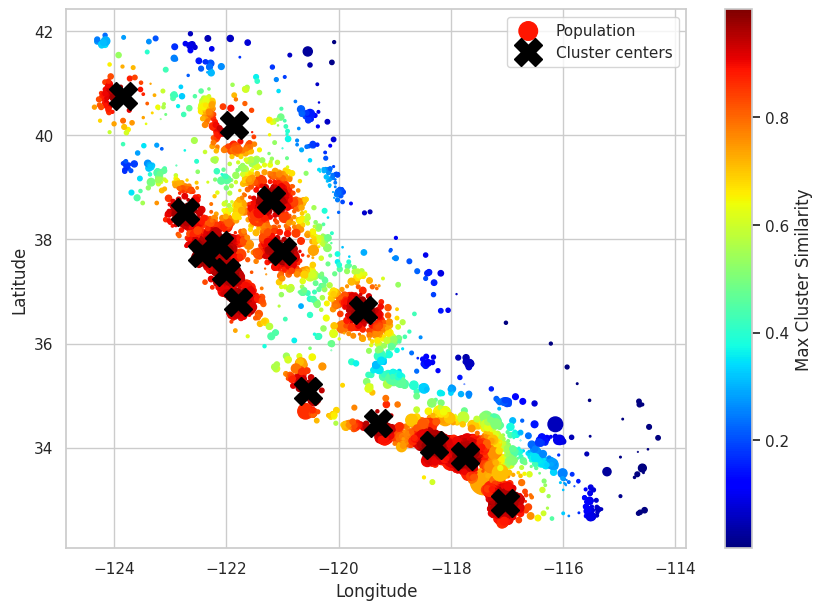

In [ ]:
housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
            s=housing_renamed["Population"] / 100, label="Population",
            c="Max Cluster Similarity", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7)
        )
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
        cluster_simil.kmeans_.cluster_centers_[:, 0],
        linestyle="", color="black", marker="X",
        markersize=20, label="Cluster centers"
    )
plt.legend(loc="upper right")
plt.savefig("district_cluster_plot")
plt.show()

## Using Column Transfomer to transform categorical ans numerical data combinedly

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

### Combining all the transformation in one
1. Missing features will be replaced with their median and categorical with most frequent one
2. The categorical feature will be one hot encoded
3. A few ratio will be calculate : bedroom_ratio, rooms_per_house, people_per_house
4. A few cluster similarity will be added for lattitude and longitude
5. Features with long tail will be replaced with their logarithm
6. All numerical features will be standardized

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

def column_ratio(X):
  return X[:, [0]] / X[:, [1]]
def ratio_name(function_transformer, feature_names_in):
  return ["ratio"] # feature names out
def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(column_ratio,
      feature_names_out=ratio_name),
      StandardScaler()
  )

log_pipeline = make_pipeline(
                SimpleImputer(strategy="median"),
                FunctionTransformer(np.log, feature_names_out="one-to-one"),
                StandardScaler()
            )
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),],
    remainder=default_num_pipeline) # one column remaining: housing_median_age

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
housing_prepared.shape

(16512, 24)

In [ ]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [ ]:
df_housing_prepared = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out())

In [ ]:
df_housing_prepared.head()

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
0,-0.121122,0.017395,0.006223,0.873403,0.852032,0.938249,0.797843,-0.998832,3.349885e-14,3.397499e-01,...,5.953849e-08,6.004391e-05,6.551077e-17,1.674858e-01,0.0,1.0,0.0,0.0,0.0,0.027564
1,-0.810867,0.569256,-0.040811,0.970407,1.277433,0.796538,0.913214,1.277742,1.688395e-01,2.582993e-22,...,1.334819e-04,6.707494e-44,4.207138e-01,9.092777e-18,0.0,0.0,0.0,0.0,1.0,-1.722018
2,-0.338273,-0.018024,-0.075371,-0.430559,-0.317644,-0.702499,-0.375177,-0.403837,7.616164e-02,2.449418e-08,...,5.598600e-01,2.154625e-22,8.891781e-03,7.673985e-06,0.0,1.0,0.0,0.0,0.0,1.220460
3,0.961205,-0.595140,-0.106803,0.281063,-0.118663,-0.299288,0.277558,-0.947769,6.601561e-02,3.002507e-24,...,2.161943e-05,9.548568e-47,1.936051e-01,1.848266e-19,0.0,0.0,0.0,0.0,1.0,-0.370069
4,-0.474513,0.251241,0.006109,0.583337,0.730040,0.671139,0.528397,0.547635,7.238826e-01,2.527183e-12,...,2.985914e-01,2.506932e-29,1.473408e-01,4.829396e-09,1.0,0.0,0.0,0.0,0.0,-0.131489


#Train the model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f4...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f44b09b05e0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing)
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


69122.90551084542

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f4...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f44b09b05e0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
tree_rmse #this is because model has already seen test df

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,67647.011686
std,2618.727162
min,62118.730843
25%,66507.187013
50%,67683.168086
75%,69195.573829
max,71245.511226


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {
      'preprocessing__geo__n_clusters': [5, 8, 10],
      'random_forest__max_features': [4, 6, 8]
    },
    {
      'preprocessing__geo__n_clusters': [10, 15],
      'random_forest__max_features': [6, 8, 10]
    },
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f44b09b05e0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

###Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3, high=50),
    'random_forest__max_features': randint(low=2, high=20)
    }

rnd_search = RandomizedSearchCV( full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f44b2a8e4d0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f44b2a8ee30>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [ ]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.18, 0.01, 0.02, 0.03,
       0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.  , 0.02, 0.02, 0.01, 0.02,
       0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.03, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [ ]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.1813831690256434, 'log__median_income'),
 (0.08244502861607364, 'cat__ocean_proximity_INLAND'),
 (0.0718801580236537, 'bedrooms__ratio'),
 (0.05817301838233788, 'rooms_per_house__ratio'),
 (0.049517115363919215, 'people_per_house__ratio'),
 (0.03248219147637665, 'geo__Cluster 2 similarity'),
 (0.028221062269895562, 'geo__Cluster 43 similarity'),
 (0.022653278091252674, 'geo__Cluster 6 similarity'),
 (0.02198898088685375, 'geo__Cluster 15 similarity'),
 (0.021199799837403884, 'geo__Cluster 10 similarity'),
 (0.01773675216603871, 'geo__Cluster 11 similarity'),
 (0.016812078342102393, 'geo__Cluster 24 similarity'),
 (0.0166587519568679, 'geo__Cluster 13 similarity'),
 (0.015499668492902265, 'geo__Cluster 1 similarity'),
 (0.014115237838677923, 'geo__Cluster 23 similarity'),
 (0.01354873263940505, 'geo__Cluster 25 similarity'),
 (0.012858660059159845, 'geo__Cluster 0 similarity'),
 (0.012738526960538106, 'remainder__housing_median_age'),
 (0.012678159416906736, 'geo__Cluster 36 similar

In [ ]:
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f44acd...
                                                  ClusterSimilarity(n_clusters=45,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f44ac68c250>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=9, random_state=42))])

In [ ]:
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

final_pred = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print(final_rmse)

39565.359517373756


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                  loc=squared_errors.mean(),
                  scale=stats.sem(squared_errors)))


array([37712.09234569, 41335.61948717])

#Launch ML Model

In [ ]:
import joblib
joblib.dump(final_model, "california_housing_model.pkl")

['california_housing_model.pkl']

In [ ]:
model = joblib.load("california_housing_model.pkl")

In [ ]:
t1 = pd.DataFrame([[-117.07, 32.77, 38, 3780, 614, 1500, 614, 4.35, "NEAR OCEAN"]], columns=X_test.columns)
t1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-117.07,32.77,38,3780,614,1500,614,4.35,NEAR OCEAN


In [ ]:
t1_prediction = model.predict(t1)

In [ ]:
t1_prediction

array([217037.])